<b>  <center>    Python_Mini Project <br>                            Name: Belyanesh Mossie<br>
                             ID: EP7203363</b>
                           

<b>Part One<br>Q#1. 
<br>A.</b> Both covariance and correlation mesaures the relation ship between two variables. Covarience measures the degree to which two variables are dependent(increase or decrease together) and Correlation measures the strength and the direction of the relationship.
The formula for covarience is $$ \text{Cov}(X, Y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n - 1} $$
And for th correlation: $$ \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$




In [17]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<b>B.</b> Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv")
in Pandas).<br>
Use visualization to explore the relationship between the different features.

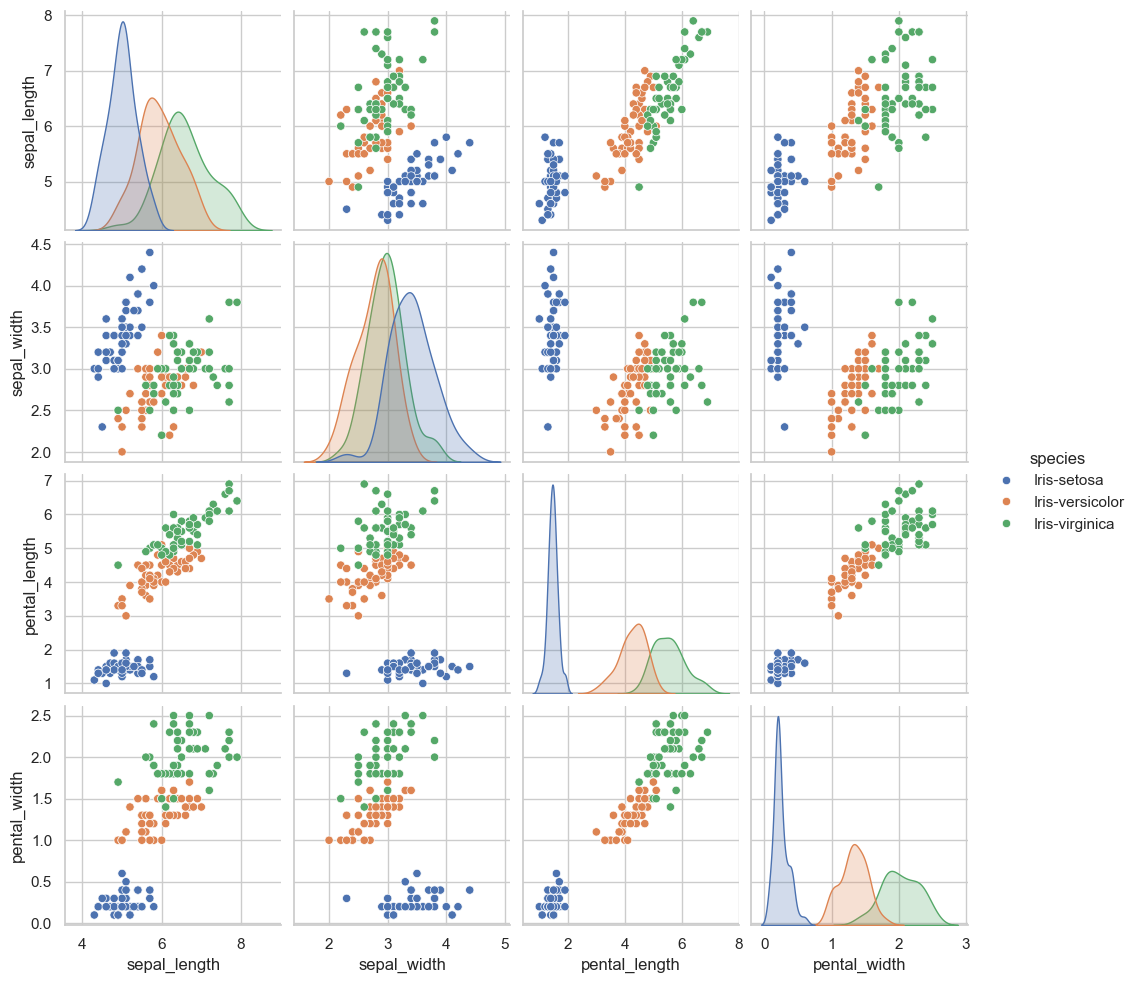

In [154]:
#B. Load the Iris dataset,

iris_data=pd.read_csv('./iris.csv')
iris_data.head()
# visualization to explore the relationship between the different features.
sns.pairplot(iris_data, diag_kind="kde", hue="species")  
plt.show()

💡 From the above plots, the pair plot visualizes the relationships between Iris features. Petal length and petal width are most effective in distinguishing species, particularly separating 'Iris-setosa' from the others.

<b>C.</b> Implement the following functions:<br>
a. A function to calculate the covariance between two variables:<br>
def calcCov(x, y): <your implementation here>,<br>
b. A function to compute the Covariance matrix:<br>
def covMat(data): <your implementation here><br>
covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)

In [23]:

#a. A function to calculate the covariance between two variables:
def calcCov(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    covariance = np.sum((x - x_mean) * (y -  y_mean)) / (len(x)-1)
    return covariance
#b. A function to compute the Covariance matrix:
def covMat(data): 
    n_features = data.shape[1]
    cov_matrix = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            cov_matrix[i, j] = calcCov(data[:, i], data[:, j])
    return cov_matrix


<b>D.</b> Test1: compare the results of your function with NumPy's
np.cov(data,rowvar=False) using the iris dataset.

In [155]:

iris_features = iris_data.iloc[:, :-1].values

# Testing covariance matrix implementation
custom_cov_matrix = covMat(iris_features)
numpy_cov_matrix = np.cov(iris_features, rowvar=False)

# Compare results
print("Custom Covariance Matrix:\n", custom_cov_matrix)
print("NumPy Covariance Matrix:\n", numpy_cov_matrix)


Custom Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
NumPy Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


✅ The calculated covariance matrix calculated using the covMat function matches exactly with the result of NumPy np.cov() function, confirms the correctness of the custom implementation

<b>E.</b> Using your covariance function, implement a function to calculate the correlation
matrix:<br>
def corrMat(data):<br>
<should use covMat(data) and return the correlation matrix>

In [157]:

def corrMat(data):
    std_devs = np.sqrt(np.diag(covMat(data)))  # Extract standard deviations
    corr_matrix = covMat(data) / np.outer(std_devs, std_devs) #compute correlation matrix by normalizing the covarience 
    return corr_matrix

corrMat(iris_features)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

<b> F.</b> Test2: validate your correlation matrix implementation by comparing it with the
results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [158]:
# Test my correlation matrix implementation
custom_corr_matrix = corrMat(iris_features)
numpy_corr_matrix = np.corrcoef(iris_features, rowvar=False)

# Compare results
print("Custom Correlation Matrix:\n", custom_corr_matrix)
print("NumPy Correlation Matrix:\n", numpy_corr_matrix)


Custom Correlation Matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
NumPy Correlation Matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


✅ Again The custom correlation matrix calculated using the corrMat() function exactly matches the result of the NumPy's np.corrcoef() function, confirming the accuracy of the custom implementation.

<b>G.</b> Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.

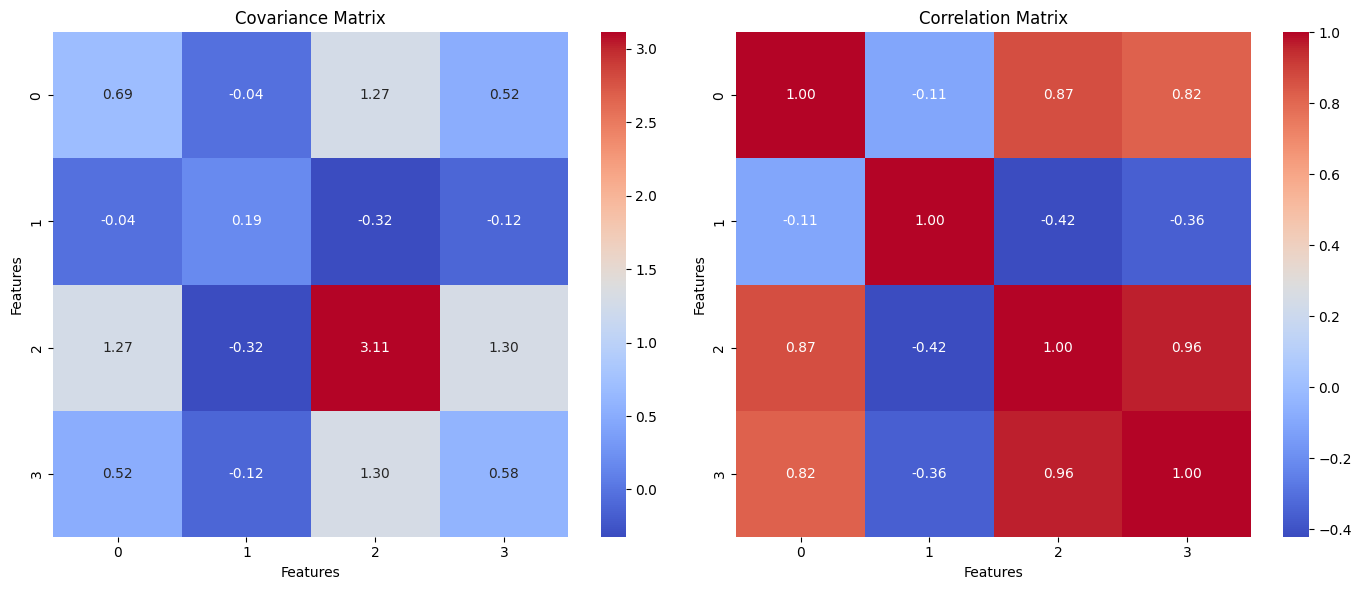

In [29]:
# Visualize covariance and correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Covariance matrix visualization
sns.heatmap(custom_cov_matrix, annot=True, fmt=".2f", ax=axes[0], cmap="coolwarm")
axes[0].set_title("Covariance Matrix")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Features")

# Correlation matrix visualization
sns.heatmap(custom_corr_matrix, annot=True, fmt=".2f", ax=axes[1], cmap="coolwarm")
axes[1].set_title("Correlation Matrix")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Features")

plt.tight_layout()
plt.show()


💡 The heatmaps show the covariance and correlation between features. High values indicate strong relationships, either positive or negative. Covariance values are higher than correlation values, suggesting non-linear relationships between some features.

<b> Part two<br>
Q#2</b>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [94]:
# Load the dataset
df = pd.read_csv('./laptop_price.csv')

print(df.head())

# Check for any issues in column names or missing data
print(df.info())


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

2.1 Plot the price of all the laptops

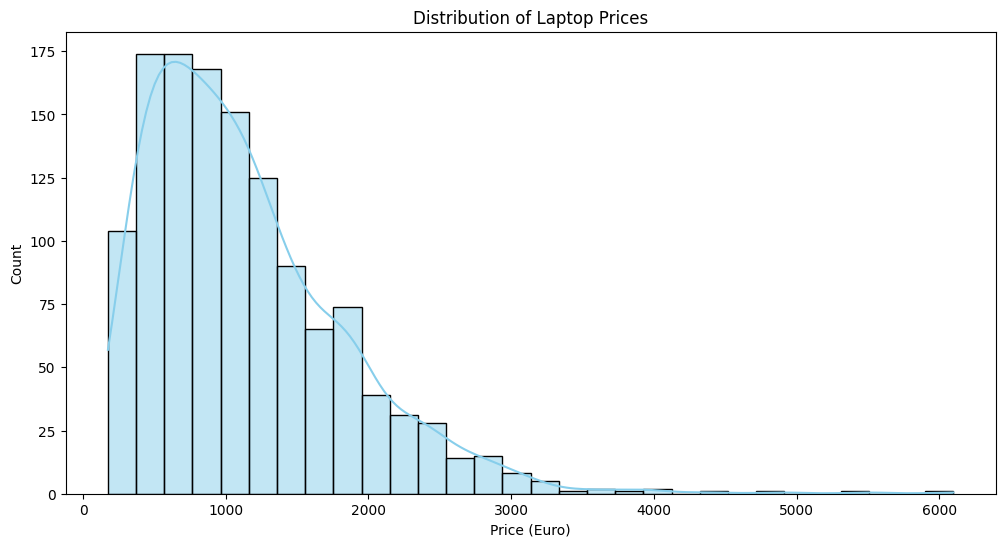

In [38]:
# Plot the price of all laptops
plt.figure(figsize=(12, 6))
sns.histplot(df['Price (Euro)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Count')
plt.show()


💡 The distribution plot shows that most laptops are priced lower, with a few high-priced laptops. The peak of the distribution is around 500 euros, showing that this is the most common price range.

2.2 Which company has on average the most expensive laptop? What is the average
laptop price for each company?

Average Price of Laptops for each Company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64
The company with the most expensive laptops is Razer with an average price of 3346.14€


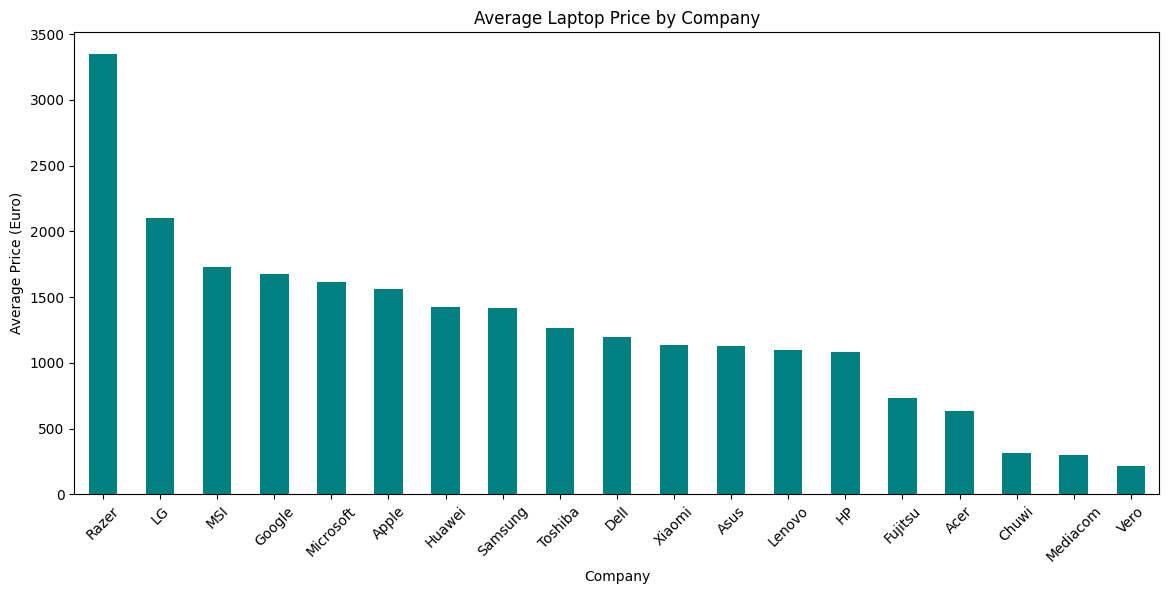

In [45]:
# Group by 'Company' and calculate the average price
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
print("Average Price of Laptops for each Company:")
print(avg_price_per_company)

# Find the company with the most expensive average laptops
expensive_company = avg_price_per_company.idxmax()
highest_avg_price = avg_price_per_company.max()
print(f"The company with the most expensive laptops is {expensive_company} with an average price of {highest_avg_price:.2f}€")

# Plot the average price for each company
plt.figure(figsize=(14, 6))
avg_price_per_company.plot(kind='bar', color='teal')
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)
plt.show()


💡 The plot demonstrates that Razer laptops have the highest average price, while Vero laptops have the lowest average price. The chart also shows that there is a wide range of average prices across different companies.

2.3 Find the different types of Operating systems present in the data - under the column
name "OpSys".
<br> Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [160]:
def clean_os(os):
    os_names = { # with out many if else statments
        'Windows': 'Windows',
        'Mac': 'MacOS',  # Both Mac and macOS are mapped to 'MacOS'
        'Linux': 'Linux',
        'Chrome': 'Chrome OS'
    }

    # Loop through the dictionary keys and check if part of the word is in the OS name
    for keyword, std_name in os_names.items():
        if keyword.lower() in os.lower():  
            return std_name
    
    # Return the original OS if no match is found
    return os

# Apply the function to clean the OpSys column
df['OpSys'] = df['OpSys'].apply(clean_os)
print(df['OpSys'].value_counts())


OpSys
Windows      1101
No OS          66
Linux          58
Chrome OS      27
MacOS          21
Android         2
Name: count, dtype: int64


💡 Windows os dominates the dataset, with significantly more instances than any other operating system. No OS, Linux, and Chrome OS have moderate representation, while MacOS and Android have limited presence.

2.4 Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

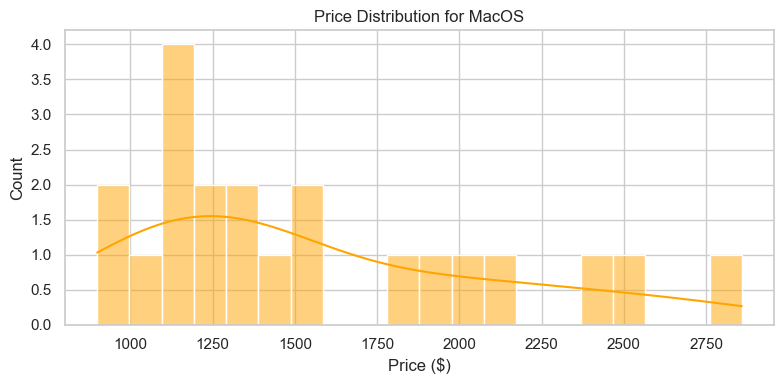

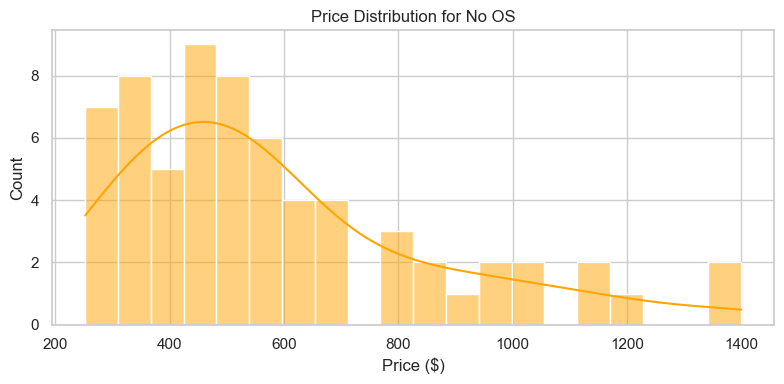

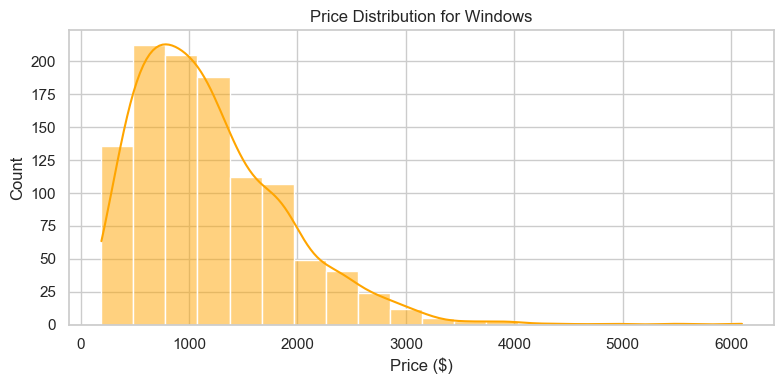

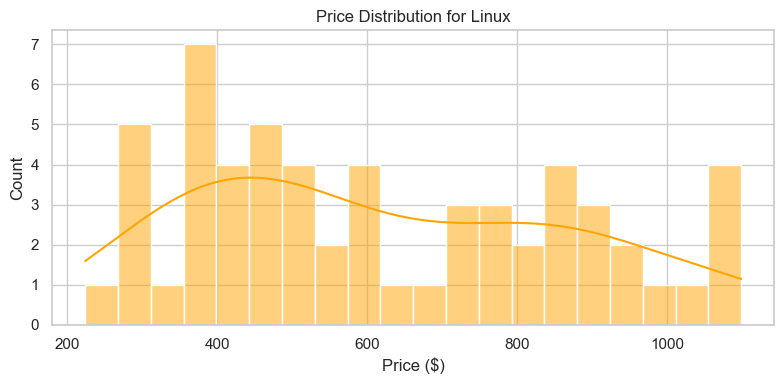

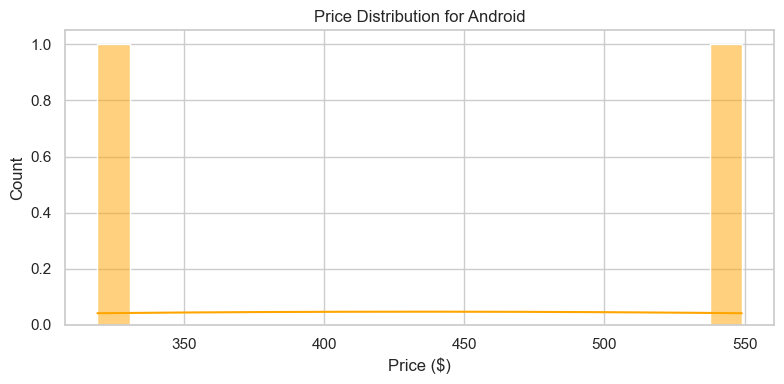

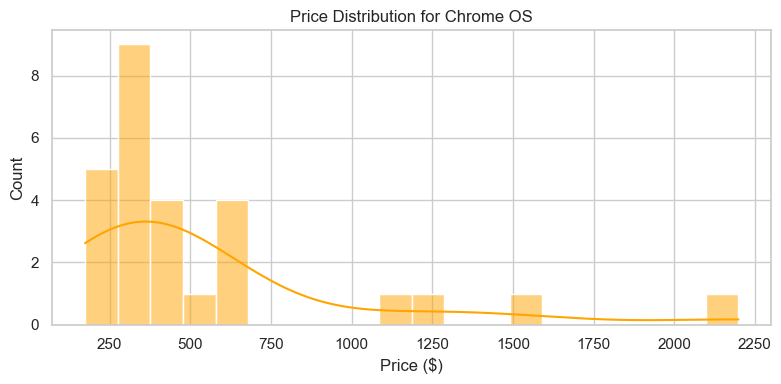

In [161]:

unique_os = df['OpSys'].unique()

for os in unique_os:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['OpSys'] == os]['Price (Euro)'], bins=20, kde=True, color='orange')
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price ($)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


💡 Based on the plots, Windows laptops tend to be the most affordable, with a distribution all towards lower prices. Linux laptops are slightly more expensive than Windows. macOS laptops are generally the most expensive, with a higher average price. Chrome OS laptops show a wider price range, with both cheap and expensive models available. Laptops with no OS installed have a relatively balanced price distribution

2.5 What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

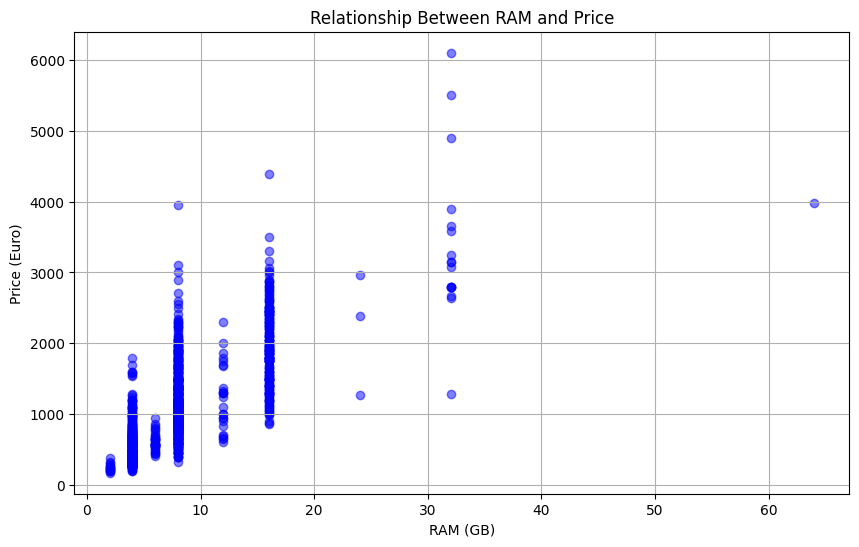

In [83]:
# Convert RAM column to string and clean up the data
df['RAM'] = df['RAM (GB)'].astype(str).str.replace('GB', '', regex=False).astype(int)

# Plot RAM vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM'], df['Price (Euro)'], color='blue', alpha=0.5)
plt.title('Relationship Between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid()
plt.show()


💡 The scatter plot shows a positive correlation between RAM and laptop price. As RAM increases, the price generally increases, though not always linearly. May be other factors also influence the price.

2.6 Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
o For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

In [164]:
import re  # regex package to find words of storage names from memory column

def extract_storage_type(memory):
    # Extract standard SSD, HDD, Flash Storage, or Hybrid (included in the same regex)
    storage_search = re.search(r'(SSD|HDD|Flash Storage|Hybrid)', memory)
    
    if storage_search:
        return storage_search.group(1)
    return 'Unknown'     # If no match found, return 'Unknown'
df['Storage_Type'] = df['Memory'].apply(extract_storage_type) # Create new column 'Storage_Type'
print("\nSample Rows:")
print(df[['Memory', 'Storage_Type']].head(10)) # Displaying a few rows to verify extraction



Sample Rows:
                Memory   Storage_Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
5            500GB HDD            HDD
6  256GB Flash Storage  Flash Storage
7  256GB Flash Storage  Flash Storage
8            512GB SSD            SSD
9            256GB SSD            SSD


<b>Q3:</b> Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.<br>
The following can be possible questions related to this data.<br>
1. How different CPU types correlate with laptop prices<br>
2. What is the relationship between screen size(icnhes column) and laptop price? <br>
3. What is the most common RAM size among laptops?<br>
4. How does different storage type affect laptop price<br>
5. the effect of GPU on the laptop price <br>
6. What is the average price of laptops for each screen resolution type? etc.. and I choose only those two <br>
   1. What is the most common RAM size among laptops? and<br>
   2. How different CPU types correlate with laptop prices?<br>

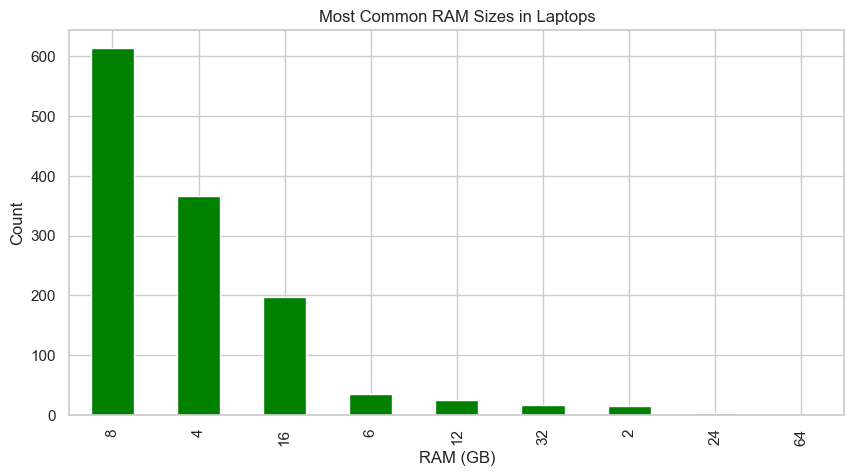

In [150]:
#A.What is the most common RAM size among laptops?
ram_counts = df['RAM (GB)'].value_counts() # Count occurrences of RAM sizes

# Plotting the most common RAM sizes
plt.figure(figsize=(10, 5))
ram_counts.plot(kind='bar', color='green')
plt.title('Most Common RAM Sizes in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


💡 Based on the bar chrt 8GB RAM is the most common size in laptops, followed by 4GB and 16GB. And other sizes are less frequent.

3.B. How different CPU types correlate with laptop prices?

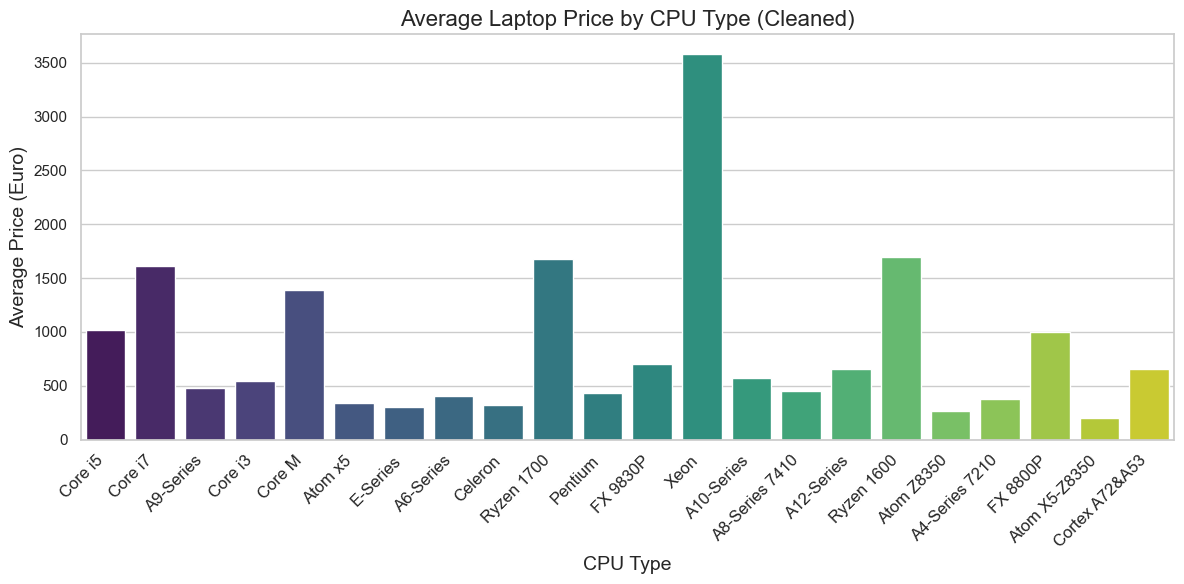

In [153]:


# Extract by generaizing core i types and others under one family
df['CPU_Type_Clean'] = df['CPU_Type'].str.extract(r'(Core i[3-9]|Core M|Xeon|Celeron|Pentium|A9-Series|A10-Series|E-Series|A6-Series|A12-Series|Atom x5)', expand=False)

# For rows that don't match the pattern, keep as it is
df['CPU_Type_Clean'] = df['CPU_Type_Clean'].fillna(df['CPU_Type'])

# Plotting the average price by cleaned CPU type
plt.figure(figsize=(12, 6))  
# Create the barplot
sns.barplot(x='CPU_Type_Clean', y='Price (Euro)', data=df, hue='CPU_Type_Clean', palette="viridis", errorbar=None)

plt.title("Average Laptop Price by CPU Type (Cleaned)", fontsize=16)
plt.xlabel("CPU Type", fontsize=14)
plt.ylabel("Average Price (Euro)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


💡 In order to simplify the analysis, similar CPU families were grouped (e.g., all 'Core i3' types were combined into 'Core i3'). The results show that Xeon CPUs have the highest average price, while Atom X5-Z8350 CPUs have the lowest average price.  There is a large price variation across different CPU families.